# Data Analysis on Uber Data for April 2014

![Uber Logo](https://upload.wikimedia.org/wikipedia/commons/5/58/Uber_logo_2018.svg)

The Data is available on data.world

In [1]:
import pandas as pd
import datetime as dt
import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [2]:
df = pd.read_csv("./data/uber-raw-data-apr14.csv")
df.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
df.isna().sum()

Date/Time    0
Lat          0
Lon          0
Base         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  564516 non-null  object 
 1   Lat        564516 non-null  float64
 2   Lon        564516 non-null  float64
 3   Base       564516 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [5]:
df = df.rename(columns={"Date/Time": "Date_Time"})
df['Date_Time'] = pd.to_datetime(df['Date_Time'])
df["Day of Month"] = df["Date_Time"].dt.day
df["Day"] = df["Date_Time"].dt.day_name()
df["Hour"] = df['Date_Time'].dt.strftime('%H')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Date_Time     564516 non-null  datetime64[ns]
 1   Lat           564516 non-null  float64       
 2   Lon           564516 non-null  float64       
 3   Base          564516 non-null  object        
 4   Day of Month  564516 non-null  int64         
 5   Day           564516 non-null  object        
 6   Hour          564516 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.1+ MB


In [7]:
df.Day.value_counts()

Wednesday    108631
Tuesday       91185
Friday        90303
Thursday      85067
Saturday      77218
Monday        60861
Sunday        51251
Name: Day, dtype: int64

In [8]:
df.Hour.value_counts()

17    45475
18    43003
16    42003
19    38923
21    36964
20    36244
15    35324
22    30645
14    27190
07    24924
08    22843
13    22603
23    20649
12    19425
11    18774
06    18498
09    17939
10    17865
00    11910
05     9476
01     7769
04     6095
03     5040
02     4935
Name: Hour, dtype: int64

In [9]:
df.head()

,Date_Time,Lat,Lon,Base,Day of Month,Day,Hour
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,Tuesday,00
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,Tuesday,00
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,Tuesday,00
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,Tuesday,00
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,Tuesday,00


In [10]:
print(df.head())
print(df.shape)    

            Date_Time      Lat      Lon    Base  Day of Month      Day Hour
0 2014-04-01 00:11:00  40.7690 -73.9549  B02512             1  Tuesday   00
1 2014-04-01 00:17:00  40.7267 -74.0345  B02512             1  Tuesday   00
2 2014-04-01 00:21:00  40.7316 -73.9873  B02512             1  Tuesday   00
3 2014-04-01 00:28:00  40.7588 -73.9776  B02512             1  Tuesday   00
4 2014-04-01 00:33:00  40.7594 -73.9722  B02512             1  Tuesday   00
(564516, 7)


In [11]:
Day_Count = df.groupby("Day",as_index = False).size().sort_values("size",ascending = False)
Day_Count

,Day,size
6,Wednesday,108631
5,Tuesday,91185
0,Friday,90303
4,Thursday,85067
2,Saturday,77218
1,Monday,60861
3,Sunday,51251


In [12]:
Day_Count.plot_bokeh(
    kind='bar',
    x='Day',
    y= "size",
    xlabel='Day of the week',
    ylabel='Total Passenger for each day',
    title='Weekly Rides',
    color = "Black"
)

Figure(id='1039', ...)

<AxesSubplot:title={'center':'Weekly Rides'}, xlabel='Day of the week', ylabel='Total Passenger for each day'>

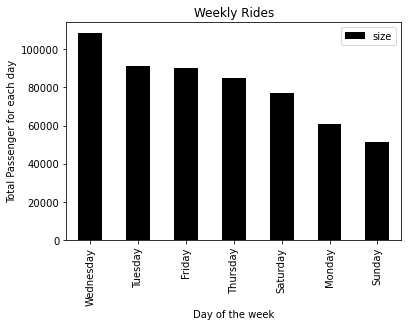

In [13]:
Day_Count.plot(
    kind='bar',
    x='Day',
    y= "size",
    xlabel='Day of the week',
    ylabel='Total Passenger for each day',
    title='Weekly Rides',
    color = "Black"
)

In [14]:
df.Base.value_counts()

B02682    227808
B02598    183263
B02617    108001
B02512     35536
B02764      9908
Name: Base, dtype: int64

## Frequency by Day of Month

In [15]:
dom_freq = df.groupby("Day of Month",as_index = False).size().sort_values("size",ascending = False)
dom_freq

,Day of Month,size
29,30,36251
3,4,26714
24,25,25095
25,26,24925
23,24,23352
28,29,22835
16,17,20973
2,3,20701
14,15,20641
10,11,20420


In [16]:
dom_freq.plot_bokeh(kind = "bar",x = "Day of Month",y = "size",
                    xlabel = "Day of Month",
                    ylabel = "Frequency of Cab Rides",
                    title = "Frequency of Rides per Month"
                    )

Figure(id='1182', ...)

<AxesSubplot:title={'center':'Frequency of Rides per Month'}, xlabel='Day of Month', ylabel='Frequency of Cab Rides'>

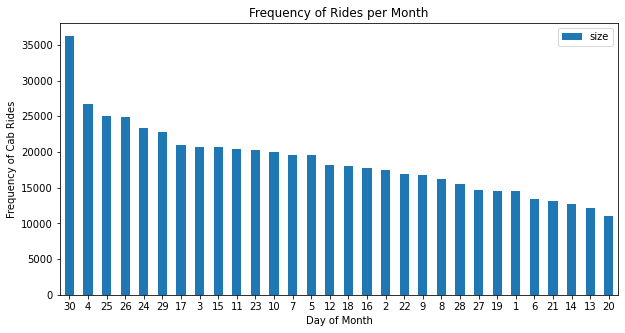

In [17]:
dom_freq.plot(kind = "bar",x = "Day of Month",y = "size",
                    xlabel = "Day of Month",
                    ylabel = "Frequency of Cab Rides",
                    title = "Frequency of Rides per Month",
                    rot = 0,
                    figsize = (10,5))

## Frequency by hour

In [18]:
hour_freq = df.groupby("Hour", as_index = False).size()
hour_freq

,Hour,size
0,00,11910
1,01,7769
2,02,4935
3,03,5040
4,04,6095
5,05,9476
6,06,18498
7,07,24924
8,08,22843
9,09,17939


<AxesSubplot:title={'center':' Frequency of CabRides (per Hour)'}, xlabel='Hour of the Day', ylabel='No of Passengers'>

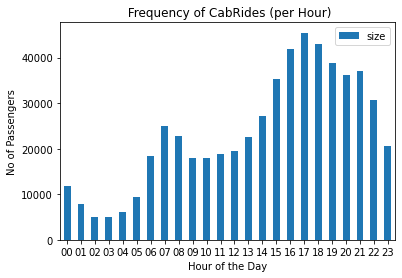

In [19]:
hour_freq.plot(kind = "bar",
               x = "Hour", y="size",
               xlabel = "Hour of the Day",
              ylabel = "No of Passengers",
               rot = 0,
              title = " Frequency of CabRides (per Hour)")

In [20]:
perh_perday = df.groupby(["Hour","Day"]).size().sort_values(ascending = False).head(10)
perh_perday

Hour  Day      
17    Wednesday    9151
18    Wednesday    8334
17    Tuesday      8297
16    Wednesday    8213
19    Wednesday    7794
20    Wednesday    7783
16    Tuesday      7521
18    Friday       7258
      Tuesday      7089
15    Wednesday    7071
dtype: int64

In [21]:
perh_perday.plot_bokeh(kind = "bar",
                    xlabel = "Day and Hour of the week",
                    ylabel = "Frequency",
                    title = "No. of, Passengers at a given hour",
                    figsize = (1000,450))

Figure(id='1333', ...)

<AxesSubplot:title={'center':'No. of, Passengers at a given hour'}, xlabel='Day and Hour of the week', ylabel='Frequency'>

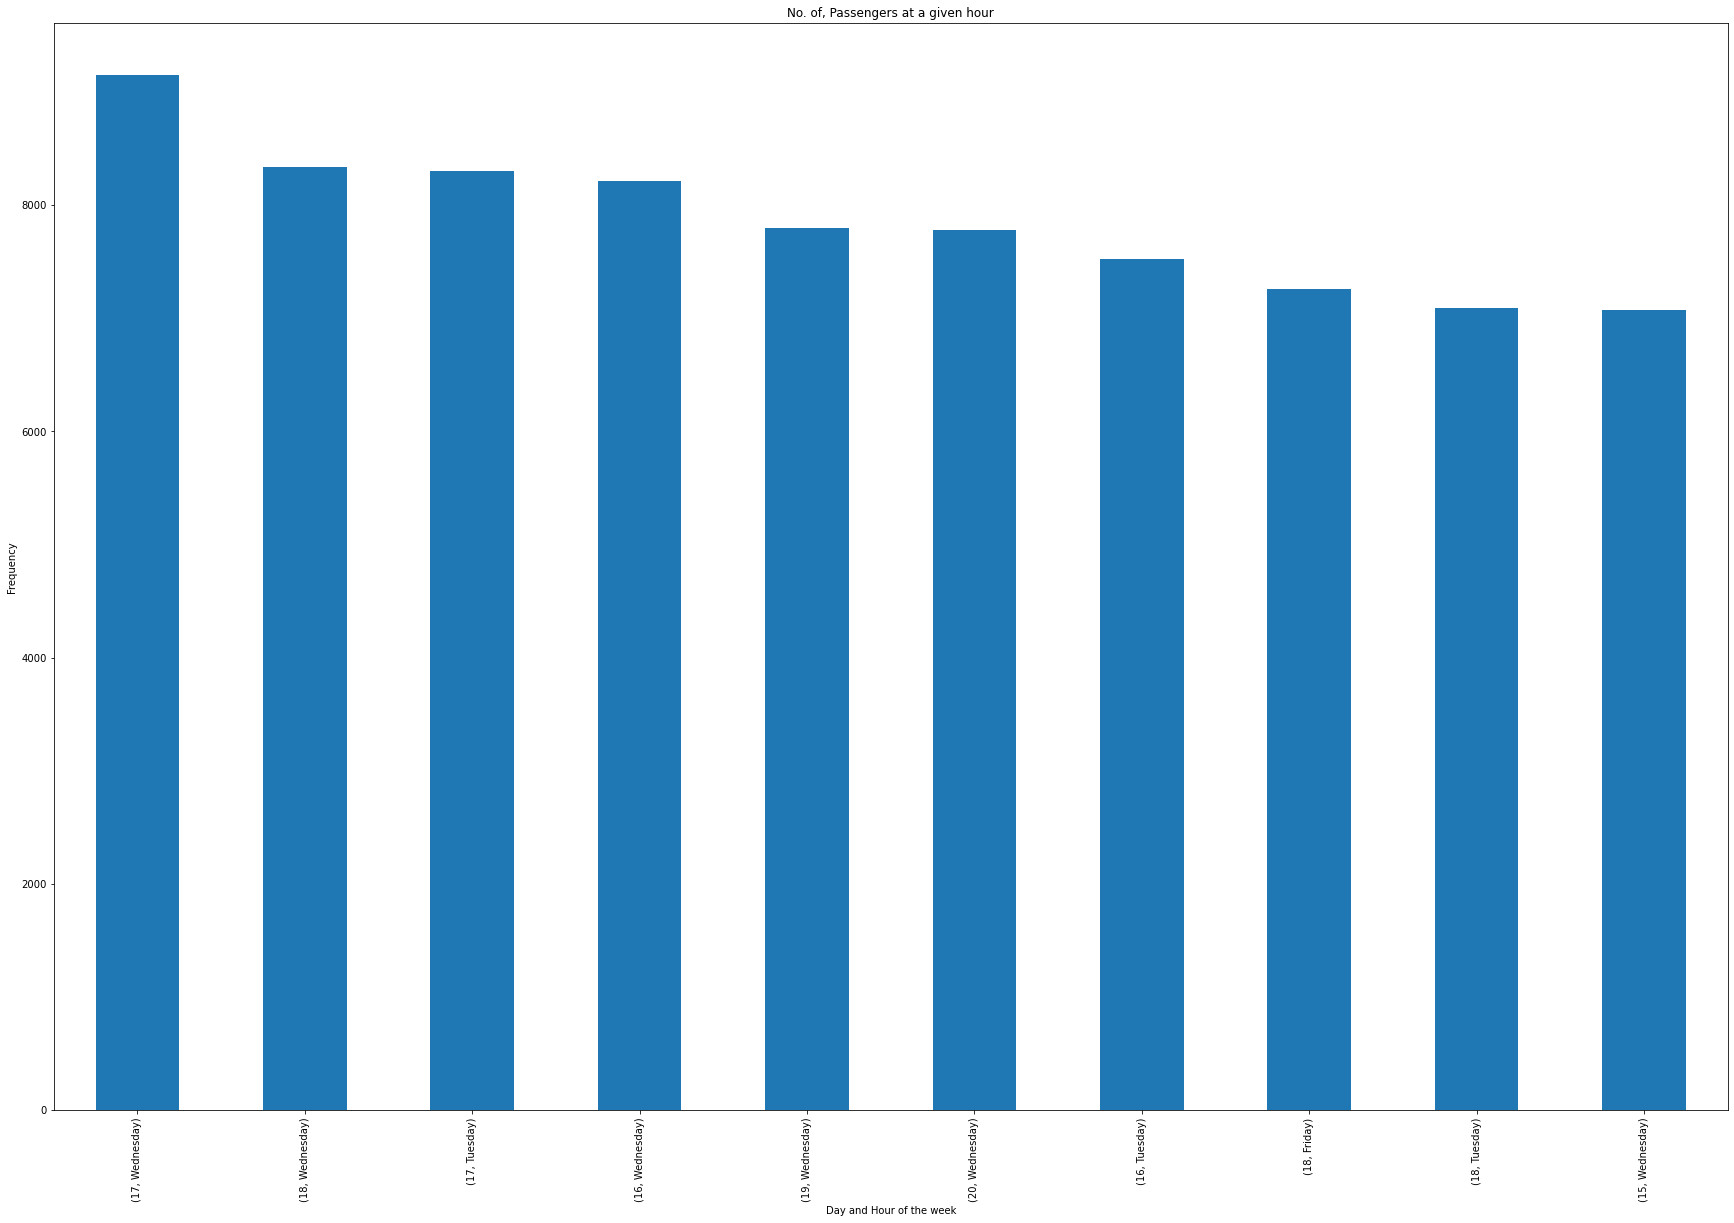

In [22]:
perh_perday.plot(kind = "bar",
                    xlabel = "Day and Hour of the week",
                    ylabel = "Frequency",
                    title = "No. of, Passengers at a given hour",
                 rot = 90,
                    figsize = (30,20))